In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
Train_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRTK2NvcndgPX41Czu6Ft2Ho_nE-z50BgTqdzwFW0rsJ2nvyNLe2DoIg1COzUbgw80oaRBjfy5-WtFk/pubhtml"

In [3]:
response = requests.get(Train_url)
response.raise_for_status()
soup = BeautifulSoup(response.text, "html.parser")
s = soup.find('table', {'class':'waffle'})
tr = s.find_all('tr')
x = [0,0]
y = []
for i in tr:
    x = i.find_all('td', {'class':'s1'})
    if len(x)>1:
        y.append({
            'x':int(x[0].text.strip()),
            'y':x[1].text.strip()
        })

In [4]:
df = pd.DataFrame(y)
df['y'] = pd.to_numeric(df['y'])
df.to_csv('Train.csv', index = False)
print("saved to train.csv")

saved to train.csv


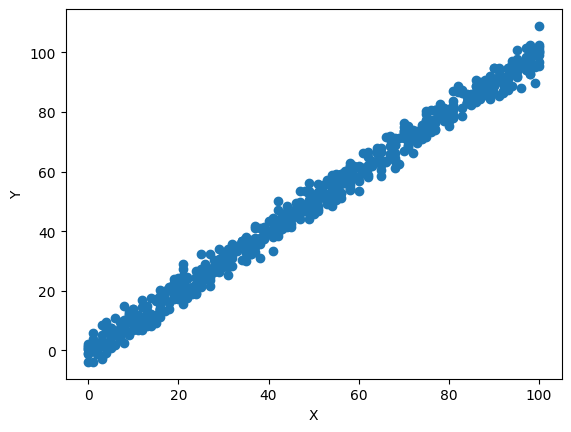

In [5]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df['x'], df['y'])
plt.show()

In [6]:
data = pd.read_csv('Train.csv')
data.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [7]:
x_train = data[['x']]
y_train = data['y']

In [8]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
test_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRyvZ7lknwiSghK9aen1SaTEYoN3JS40rrGLpcyrsVZy1tB2T4gn6Y3-cdzPUFCPMmmqREWefW3kl4_/pubhtml"

In [10]:
response = requests.get(test_url)
response.raise_for_status()
soup = BeautifulSoup(response.text, "html.parser")
s = soup.find('table', {'class':'waffle'})
tr = s.find_all('tr')
x = [0,0]
y = []
for i in tr:
    x = i.find_all('td', {'class':'s1'})
    if len(x)>1:
        y.append({
            'x':int(x[0].text.strip()),
            'y':x[1].text.strip()
        })

In [11]:
df = pd.DataFrame(y)
df['y'] = pd.to_numeric(df['y'])
df.to_csv('Test.csv', index = False)
print("saved to test.csv")

saved to test.csv


In [12]:
x_test = data[['x']]
y_test = data['y']

In [13]:
y_pred = model.predict(x_test)
y_pred

array([23.9084877 , 49.92555363, 14.90258026, 37.91767705, 86.94983976,
       35.91636428, 11.90061112, 80.94590147, 24.90914408,  4.89601644,
       15.90323665, 15.90323665, 23.9084877 , 38.91833343, 53.92817916,
       59.93211745, 25.90980046, 72.94065041, 28.91176961, 30.91308237,
       67.9373685 , 86.94983976, 57.93080468, 53.92817916, 83.94787061,
       57.93080468, 48.92489725, 19.90586217, 89.9518089 , 47.92424086,
        3.89536006, 24.90914408, 41.92030257, -0.10726546, 59.93211745,
       92.95377805, 38.91833343,  6.89732921, 20.90651855, 67.9373685 ,
       83.94787061, -0.10726546, 57.93080468, 18.90520579, 35.91636428,
       18.90520579, 58.93146107, 50.92621001, 18.90520579, 32.91439514,
       84.94852699, 43.92161534,  4.89601644, 58.93146107, 13.90192388,
        8.89864197, 74.94196317, 68.93802488,  9.89929835, 16.90389303,
       57.93080468, 73.94130679, 20.90651855, 50.92621001, 18.90520579,
       49.92555363, 23.9084877 , -0.10726546, 11.90061112, 74.94

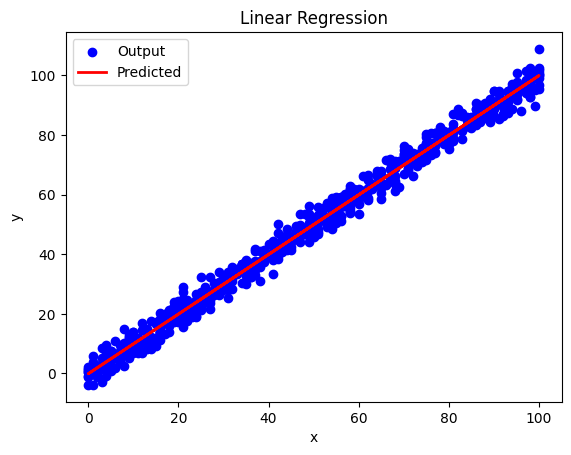

In [14]:
plt.scatter(x_test, y_test, color = 'blue', label = 'Output')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [15]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score: ", r2)


R-squared (R2) Score:  0.9907015319025518
